In [84]:
import pandas as pd
import numpy as np
data = pd.read_excel('E:/2021MCM_ProblemC_Files/2021_MCM_Problem_C_Data/2021MCMProblemC_DataSet.xlsx')
data2 = pd.read_excel('E:/2021MCM_ProblemC_Files/2021_MCM_Problem_C_Data/2021MCM_ProblemC_ Images_by_GlobalID.xlsx')
data1.head()

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude,FileName,FileType
0,{E6ADE6FB-0BD3-43EC-8E75-72EFC6F029FB},2020-03-01,Reported to Washington Invasive Species Counci...,Unverified,,2020-03-02,48.186024,-122.344680,NaN,NaN
1,{165FF3FF-8F72-4AB8-B736-4584CE8DA11F},2020-03-01,I was stung several times on my ankle.,Unverified,,2020-05-05,47.537540,-122.639263,NaN,NaN
2,{B3BCF8B7-6B90-488B-AE00-4AC9B9CB3B45},2020-03-01,I was bringing firewood up to the house and at...,Unverified,,2020-05-06,47.091218,-122.864415,NaN,NaN
3,{011FF7E9-147D-4FCA-A3B0-2340BE6A35B0},2020-03-02,Community member wanted to know if it was dang...,Negative ID,That is a Scoliid wasp.,2020-05-28,48.550103,-119.741725,ATT261_unknownwasp3.jpg,image/jpg
4,{7B407363-24DF-4E47-A515-5480DA03FB8B},2020-03-04,"I am not sure what this is, but I saw this on ...",Negative ID,A species of ichneumonid wasp,2020-04-13,47.634119,-122.646627,ATT48_Screenshot_20200413-140416_Photos.jpg,image/jpg


In [23]:
data=data[data['Lab Status']!='Unprocessed']

In [145]:
import pandas as pd
data1 = pd.read_excel('C:/Users/super qing/Documents/Tencent Files/874489829/FileRecv/处理后的四季数据.xlsx',sheet_name= 0)
data2 = pd.read_excel('C:/Users/super qing/Documents/Tencent Files/874489829/FileRecv/处理后的四季数据.xlsx',sheet_name= 1)
data3 = pd.read_excel('C:/Users/super qing/Documents/Tencent Files/874489829/FileRecv/处理后的四季数据.xlsx',sheet_name= 2)
data4 = pd.read_excel('C:/Users/super qing/Documents/Tencent Files/874489829/FileRecv/处理后的四季数据.xlsx',sheet_name= 3)

In [146]:
df1=data1
df2=pd.concat([data1,data2])
df3=pd.concat([data1,data2,data3])
df4=pd.concat([data1,data2,data3,data4])

In [149]:
data=df4

In [157]:
data.iloc[3450]

GlobalID                      {E57830CA-B69E-4B97-A461-EA474BAAF005}
Detection Date                                   2020-08-15 00:00:00
Notes              Saw the Asian Giant Hornet land on my knee and...
Lab Status                                                Unverified
Lab Comments                                                        
Submission Date                                  2020-08-15 00:00:00
Latitude                                                     47.6724
Longitude                                                    -122.57
FileName                                                         NaN
FileType                                                         NaN
wen                Saw the Asian Giant Hornet land on my knee and...
Name: 2571, dtype: object

In [ ]:

a = data['Notes'].values.tolist() 
b = data['Lab Comments'].values.tolist()
wen = []
for i in range(len(data)):
    tem_1 = str(a[i])
    tem_2 = str(b[i])
    tem_w = tem_1+tem_2   
    wen.append(tem_w)

data['wen'] = wen

import re
stopwords = pd.read_table('C:/Users/super qing/Documents/Tencent Files/874489829/FileRecv/stopword.txt',sep='\t',index_col=False,quoting=3,names=['stopword'],encoding='utf-8')
stopwords = stopwords.stopword.values.tolist()

# 定义分词函数
def cut_word(word):
    cw = word.split(' ')
    return cw


data['wen'] = data['wen'].astype('str')
 
    
    
for j in range(len(data['wen'])):
    data['wen'][j] =re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+"," ",str(data['wen'][j]))
        

data['wen'] = data['wen'].apply(cut_word)
   

    # 删除停用词
data['wen'] = data['wen'].apply(lambda x: [item for item in x if item not in stopwords])
   


In [87]:
for i in range(len(data['wen'])):
    for j in range(len(data['wen'][i])):
        data['wen'][i][j]=data['wen'][i][j].lower()

In [88]:
import numpy as np
y=data['Lab Status']
y1=[]
for i in range(len(y)):
    tem=np.zeros(3)
    if y[i][0]=='N':
        x=0
    elif y[i][0]=='P':
        x=1
        
    else:
        x=2
    tem[x]=1
    y1.append(tem)
    #print(x)

y=np.array(y1)


In [89]:

fin=data['wen'].values.tolist()

fin_l = []
for i in range(len(fin)):
    tem_li = []
    for word in fin[i]:
        if word in stopwords:
            continue
        if word == '':
            continue
        else:
            tem_li.append(word)
    tem = ' '.join(tem_li)
    fin_l.append(tem)

In [40]:
fin_l = []
for i in range(len(fin)):
    tem_li = []
    for word in fin[i]:
        if word in stopwords:
            continue
        if word == '':
            continue
        else:
            tem_li.append(word)
    tem = ' '.join(tem_li)
    fin_l.append(tem)

In [41]:
len(fin_l)

879

In [91]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = 10000#词汇量
embedding_dim = 32
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 3000
training_sentences = fin_l[0:training_size]
testing_sentences = fin_l[training_size:]
training_labels = y[0:training_size]
testing_labels = y[training_size:]


In [92]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)##num_words:None或整数,处理的最大单词数量。duo于此数的单词丢掉
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [93]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [94]:
len(training_labels)

3000

In [97]:
da = pd.read_excel('C:/Users/super qing/Documents/Tencent Files/874489829/FileRecv/smote.xlsx')


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,y
0,0,601,1461,2144,1112,2145,1113,293,2146,80,...,0,0,0,0,0,0,0,0,0,1
1,1,146,122,333,1462,2151,2152,2153,530,1463,...,0,0,0,0,0,0,0,0,0,1
2,2,248,2154,30,531,2,1463,365,0,0,...,0,0,0,0,0,0,0,0,0,2
3,3,2,151,915,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,602,1464,110,2155,388,207,416,39,92,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,4701,415,845,1785,1306,656,1186,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4702,4702,7,121,829,104,4,67,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4703,4703,151,748,2573,2455,1175,1383,875,874,0,...,0,0,0,0,0,0,0,0,0,1
4704,4704,237,391,697,1391,2149,1943,1779,854,1184,...,0,0,0,0,0,0,0,0,0,1


In [120]:
tx=np.array(da.iloc[:,1:51])
ty=np.array(da.iloc[:,51])
ty

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [140]:
training_padded = tx[0:4600]
testing_padded = tx[4200:]
training_labels = ty[0:4600]
testing_labels = ty[4200:]

In [141]:
#byomg1

y1=[]
for i in range(len(training_labels)):
    tem=np.zeros(3)
    tem[training_labels[i].astype('int64')]=1
    print(tem) 
    y1.append(tem)

training_labels=np.array(y1)
training_labels

y1=[]
for i in range(len(testing_labels )):
    tem=np.zeros(3)
    tem[testing_labels[i].astype('int64')]=1
    y1.append(tem)

testing_labels =np.array(y1)
print(testing_labels) 

[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]

[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]

[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]

[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]

[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]

In [142]:
print(len(testing_padded))
print(len(testing_labels))

506
506


In [143]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
num_epochs = 30
history = model.fit(training_padded, training_labels, batch_size=256, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 50, 16)            160000    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 128)               41472     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 195       
Total params: 209,923
Trainable params: 209,923
Non-trainable params: 0
_________________________________________________________________
Train on 4600 samples, validate on 506 samples
Epoch 1/30
4600/4600 [==============================] - 19s 4ms/sample - loss: 1.0949 - accuracy: 0.3717 - val_loss: 1.0436 - val_accuracy: 0.9960
Epoch 2/30
4600/4600 [=============================

In [170]:
model.save('textbilstm.h5')

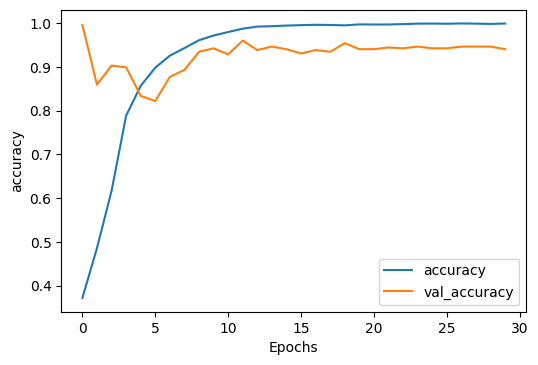

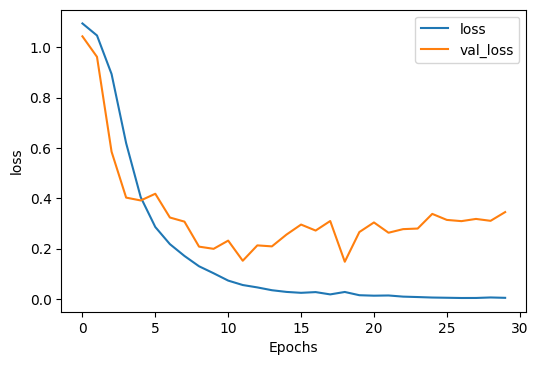

In [144]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.figure(dpi=100)
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [203]:
shu= pd.read_excel('E:/2021MCM_ProblemC_Files/2021_MCM_Problem_C_Data/2021MCMProblemC_DataSet.xlsx')

p = ['Unverified','Unprocessed']
index_s =[]
for i in range(len(shu)):
    if shu.loc[i,'Lab Status'] in p:
        index_s.append(i)
    else:
        continue
shu=shu.iloc[index_s]
shu

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
2,{13B67BCB-AFCE-4100-AD2B-76EF178BA228},2020-01-15 00:00:00,"Massive loss of bees, decapitated. No hornet s...",Unverified,,2020-01-15,48.939200,-122.661300
4,{BBBA5BA0-CAFB-43D3-8F1D-FB2D9CF777E0},2019-08-31 00:00:00,I was cleaning my gutters when I heard a snapp...,Unverified,Thanks for this report. I can't verify it from...,2020-02-14,48.723779,-122.354431
5,{EB4746A1-5A8B-4D7D-9149-D560988238EC},2019-10-15 00:00:00,We found about a dozen of these bees in our ba...,Unverified,Thanks for your submission. Here's hoping they...,2020-02-27,48.986176,-122.697450
7,{E6ADE6FB-0BD3-43EC-8E75-72EFC6F029FB},2020-03-01 00:00:00,Reported to Washington Invasive Species Counci...,Unverified,,2020-03-02,48.186024,-122.344680
10,{0AF6F3AA-8565-4B8F-8BF5-8D43D9677FE2},2019-07-17 00:00:00,,Unverified,Thank you for your submission. Since there is ...,2020-03-19,47.487496,-118.958142
...,...,...,...,...,...,...,...,...
4435,{153C4ACC-72AE-4D87-AA80-4C714417F8C6},2020-10-02 00:00:00,It was about an inch and a quarter in length. ...,Unprocessed,,2020-10-23,47.145673,-122.566734
4436,{26DDF8E2-DA0C-4F87-A65A-233115BAFCCD},2020-08-29 00:00:00,I was stung several times on the 7th hole ov t...,Unprocessed,,2020-10-23,48.997938,-122.729890
4437,{3E50801D-9DBB-43DE-8D32-31CFA88C74D9},2020-10-23 00:00:00,Found dead in humming bird feeder. Silverdale WA,Unprocessed,,2020-10-23,47.651710,-122.692750
4438,{9BA7BDD9-01A5-4776-99B0-89FCE08CA53B},2020-10-19 00:00:00,I live on Bainbridge Island on a heavily woode...,Unprocessed,,2020-10-23,47.690120,-122.509780


In [204]:

a = shu['Notes'].values.tolist() 
b = shu['Lab Comments'].values.tolist()
wen = []
for i in range(len(shu)):
    tem_1 = str(a[i])
    tem_2 = str(b[i])
    tem_w = tem_1+tem_2   
    wen.append(tem_w)

shu['wen'] = wen

In [208]:
len(yu)

2381

In [207]:
yu=pd.merge(shu.loc[:,['GlobalID','wen','Lab Status']],data2.loc[:,['GlobalID','FileName']], how='left', on=['GlobalID'])
yu.FileName.fillna(str('bai.jpg'),inplace=True)
print(yu[pd.isnull(yu['FileName'])])

Empty DataFrame
Columns: [GlobalID, wen, Lab Status, FileName]
Index: []


In [182]:
y1=[]
for i in range(len(yu['Lab Status'])):
    #tem=np.zeros(3)
    if yu['Lab Status'][i][0]=='N':
        x=0
    elif yu['Lab Status'][i][0]=='P':
        x=1
        
    else:
        x=2
    #tem[x-1]=1
    y1.append(x)
y2=[]    
for i in range(len(y1)):
    t=[y1[i]]
    y2.append(t)

In [183]:
len(y2)

2381

In [ ]:
yu

In [209]:
import re
stopwords = pd.read_table('C:/Users/super qing/Documents/Tencent Files/874489829/FileRecv/stopword.txt',sep='\t',index_col=False,quoting=3,names=['stopword'],encoding='utf-8')
stopwords = stopwords.stopword.values.tolist()

# 定义分词函数
def cut_word(word):
    cw = word.split(' ')
    return cw


yu['wen'] = yu['wen'].astype('str')
 
    
    
for j in range(len(yu['wen'])):
    yu['wen'][j] =re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+"," ",yu['wen'][j])
        

yu['wen'] = yu['wen'].apply(cut_word)
   

    # 删除停用词
yu['wen'] = yu['wen'].apply(lambda x: [item for item in x if item not in stopwords])

for i in range(len(yu['wen'])):
    for j in range(len(yu['wen'][i])):
        yu['wen'][i][j]=yu['wen'][i][j].lower()


fin=yu['wen'].values.tolist()

fin_l = []
for i in range(len(fin)):
    tem_li = []
    for word in fin[i]:
        if word in stopwords:
            continue
        if word == '':
            continue
        else:
            tem_li.append(word)
    tem = ' '.join(tem_li)
    fin_l.append(tem)

In [210]:
training_sentences = fin_l
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
yu_sequences = np.array(training_padded)
yu_sequences

array([[ 253, 2674,   30, ...,    0,    0,    0],
       [ 481, 1405,  127, ...,    0,    0,    0],
       [1003,   30, 2683, ...,    0,    0,    0],
       ...,
       [  33,  383,  240, ...,    0,    0,    0],
       [  81, 2250,  172, ...,    0,    0,    0],
       [   1,  561,  455, ...,    0,    0,    0]])

In [211]:
text_predict=model.predict(yu_sequences)
text_predict

array([[7.8319493e-09, 9.9991596e-01, 8.4016065e-05],
       [3.7688485e-01, 4.9796847e-05, 6.2306529e-01],
       [2.0881926e-05, 1.9185589e-05, 9.9995995e-01],
       ...,
       [3.2251230e-06, 9.9999666e-01, 1.7067296e-07],
       [6.3763934e-01, 2.5649229e-02, 3.3671147e-01],
       [9.9973267e-01, 3.5876973e-09, 2.6735585e-04]], dtype=float32)

In [212]:
len(yu['GlobalID'])

2381

In [202]:
len(text_predict)

2381

In [213]:
df=pd.DataFrame(text_predict)
df['y']=yu['GlobalID']


In [215]:
df.to_excel('E:/2021MCM_ProblemC_Files/2021_MCM_Problem_C_Data/result3.xlsx',index=False)


In [105]:
data1['Lab Status'].unique()

array(['Positive ID', 'Unverified', 'Negative ID', 'Unprocessed'],
      dtype=object)

In [10]:
data1[data1['Lab Status']=='Positive ID']

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},2019-12-08 00:00:00,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,2020-01-15,48.980994,-122.688503
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},2019-10-30 00:00:00,Hornet specimen sent to WSU,Positive ID,,2020-01-15,48.971949,-122.700941
3,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},2019-09-19 00:00:00,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",2020-02-04,49.149394,-123.943134
834,{AD56E8D0-CC43-45B5-B042-94D1712322B9},2020-05-27 00:00:00,,Positive ID,Specimen collected and verified by WSDA and US...,2020-05-27,48.955587,-122.661037
924,{F1864CC3-508C-4E60-9098-B158AB413B03},2019-11-13 00:00:00,,Positive ID,"Photograph only, confirmed by provincial gover...",2020-06-01,49.025831,-122.810653
956,{1C6D0EAB-F68D-411D-974E-1233618854CC},2020-05-15 00:00:00,Specimen collected by citizen scientist and re...,Positive ID,Added by WSDA,2020-06-05,49.060215,-122.641648
1011,{FC6E894B-F6DF-4FDC-853A-D7372D253988},2020-06-07 00:00:00,,Positive ID,Thank you for submitting this depressing sight...,2020-06-12,48.777534,-122.418612
1069,{7F3B6DB6-2ED4-4415-8DC2-3F03EC88F353},2019-09-30 00:00:00,Insects observed late Sept or early Oct,Positive ID,"Thank you for contacting us with photographs, ...",2020-06-15,48.993892,-122.702242
3279,{A717D86F-23E9-4C8C-9F12-198A71113E93},2020-08-17 00:00:00,"Spotted at outdoor dining in Birch Bay, posted...",Positive ID,,2020-08-24,48.927519,-122.745016
4127,{2138197A-F5CF-4308-93E2-62EA6F84D098},2020-09-21 00:00:00,"We caught and killed 2, 2nd on September 25th",Positive ID,"Thank you for submitting this important find, ...",2020-09-26,48.984269,-122.574809


In [13]:
df1=data1[data1['Lab Status']=='Positive ID'][['Latitude','Longitude']]
df1

,Latitude,Longitude
0,48.980994,-122.688503
1,48.971949,-122.700941
2,48.939200,-122.661300
3,49.149394,-123.943134
4,48.723779,-122.354431
...,...,...
4435,47.145673,-122.566734
4436,48.997938,-122.729890
4437,47.651710,-122.692750
4438,47.690120,-122.509780


In [20]:
df= data1[['GlobalID','Lab Status']]
data2 = pd.merge(data2,df,how='left',on='GlobalID')


,FileName,GlobalID,FileType,Lab Status
0,ATT1_DSCN9647.jpg,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},image/jpg,Positive ID
1111,ATT2_HoireRDBeekeeperReport.jpg,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},image/jpg,Positive ID
1449,ATT2302_image0-2.jpg,{A717D86F-23E9-4C8C-9F12-198A71113E93},image/jpg,Positive ID
1734,ATT256_47C3AA1B-C9D4-46FA-9D30-39655ACE1604.jpg,{AD56E8D0-CC43-45B5-B042-94D1712322B9},image/jpg,Positive ID
2298,ATT3067_IMG_20200926_091543.jpg,{2138197A-F5CF-4308-93E2-62EA6F84D098},image/jpg,Positive ID
2381,ATT3141_30SEP20 doorbell cam.png,{0FAC3767-EAC4-477A-B5F0-24AF8A40BD09},image/png,Positive ID
2382,ATT3142_KSal 30SEP20.jpg,{BEAC832C-0783-414A-9354-C297F38570AD},image/jpg,Positive ID
2605,ATT369_Langley 16 May.jpg,{1C6D0EAB-F68D-411D-974E-1233618854CC},image/jpg,Positive ID
2639,ATT4_20190921_152954.jpg,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},image/jpg,Positive ID
2665,ATT422_image001.jpg,{FC6E894B-F6DF-4FDC-853A-D7372D253988},image/jpg,Positive ID


In [60]:
#Positive ID
p=data2[data2['Lab Status']=='Positive ID']
p=p[['FileName']].values.tolist()
p[0]


['ATT1_DSCN9647.jpg']

In [62]:
import cv2
path= 'E:/tupian' 
for i in p:
    
    im = cv2.imread('E:/2021MCM_ProblemC_Files/2021MCM_ProblemC_Files/'+i[0])
    cv2.imwrite('E:/tupian/positive/'+str(i[0]), im)

In [81]:
#Unverified
un=data2[data2['Lab Status']=='Unverified']
a1=un[un['FileType']=='image/jpg' ][['FileName']].values.tolist()
a2=un[un['FileType']=='image/png' ][['FileName']].values.tolist()
a1=a1+a2+[['ATT1080_20200721070740855.jpg']]
a1

[['ATT1074_0BE15C65-4EE5-4321-8936-33F0C1E239BB.jpg'],
 ['ATT1081_20200721_095607.jpg'],
 ['ATT1430_39403033-2C09-4E1D-88AC-073CA13C4B25.jpg'],
 ['ATT1432_IMG_20200728_081220.jpg'],
 ['ATT1441_8714BF14-2C4E-4CA2-AE81-05F6B488DD25.jpg'],
 ['ATT1442_18C53FCB-DBEE-42D1-AE2B-A3633BD99EDE.jpg'],
 ['ATT1449_koa.jpg'],
 ['ATT148_IMG_20200512_104724.jpg'],
 ['ATT1677_hornet bite.jpg'],
 ['ATT1678_hornet.jpg'],
 ['ATT1716_7FE21875-3B17-4EE6-9961-D95A26B91112.jpg'],
 ['ATT1743_0807201529a.jpg'],
 ['ATT175_image.jpg'],
 ['ATT1766_IMG_0971.jpg'],
 ['ATT1861_20200811_102403.jpg'],
 ['ATT1866_IMG_20200811_203231_01.jpg'],
 ['ATT2076_20200817_170743.jpg'],
 ['ATT2142_image.jpg'],
 ['ATT2146_2020-08-19 14.18.34.jpg'],
 ['ATT2253_8184D704-622B-41F6-A201-A511C069FEBA.jpg'],
 ['ATT2475_IMG_2209.jpg'],
 ['ATT2476_IMG_2208.jpg'],
 ['ATT2525_9CC5FFFB-74DA-4945-9D35-66252AC5A2B7.jpg'],
 ['ATT26_279FB3AA-9441-4FED-BFC2-97F82E21D8DC.jpg'],
 ['ATT269_15907099060237302966974548855457.jpg'],
 ['ATT270_15907099250

In [111]:
un[un['FileType']!='image/jpg' ]

,FileName,GlobalID,FileType,Lab Status
91,ATT1080_20200721070740855.pdf,{A56E162D-6E19-4939-8A73-1EA927843655},application/pdf,Unverified
566,ATT1508_Screenshot_20200801-182218.png,{78F15FD1-4D30-466C-93A0-768F4078874D},image/png,Unverified
823,ATT174_trim.B1F11C96-C2F8-4401-AC39-E41EC93ED7...,{A33354EB-C2AB-4DFA-AB5A-DE65FAAC874A},video/quicktime,Unverified
1112,ATT20_download.jfif,{825396BC-07DE-45EA-8EC4-1311B30C10B8},image/jfif,Unverified
1991,ATT2791_256350F6-E92E-40C6-A34E-0EE4D2E4703A.png,{DA9922B1-D426-46D9-9C86-4A357FA088A8},image/png,Unverified
2030,ATT2826_Asian Hornet_,{A9D8FD61-FD4D-49EA-891C-191A64AA4D31},application/octet-stream,Unverified
2124,ATT2910_giant asian hornet,{A8F5AA22-3F29-4533-A0DD-21204DA91E70},application/octet-stream,Unverified
2257,ATT303_email Potential Asian Murder Hornet Sig...,{787C861E-E4B1-4359-A46C-F812846F09DE},application/pdf,Unverified
2324,ATT3090_Screenshot_20200928-141218~2.png,{940EEAF4-A404-485E-8A03-A7B5A792DAF0},image/png,Unverified
2416,ATT3173_Screenshot_20201003-200819.png,{C7196F09-439A-4BC9-A8ED-E968F3E85DBF},image/png,Unverified


In [82]:
import cv2
for i in a1:
    
    im = cv2.imread('E:/2021MCM_ProblemC_Files/2021MCM_ProblemC_Files/'+i[0])
    cv2.imwrite('E:/tupian/unverified/'+str(i[0]), im)

In [96]:
#Negative ID
n=data2[data2['Lab Status']=='Negative ID']
n

t1=n[n['FileType']=='image/jpg' ][['FileName']].values.tolist()
t2=n[n['FileType']=='image/png' ][['FileName']].values.tolist()
t=t1+t2
v1=n[n['FileType']=='video/quicktime' ][['FileName']].values.tolist()
v2=n[n['FileType']=='video/mp4' ][['FileName']].values.tolist()
v=v1+v2
v

[['ATT1046_trim.4D5547B4-E26F-401B-AE16-650AB551A8FB.MOV'],
 ['ATT1068_61698896581__AA3D3D79-1F8C-44FE-8F09-C1B3D493AC6C.MOV'],
 ['ATT1087_IMG_0857.MOV'],
 ['ATT1174_trim.4E4C6290-2B1F-40C8-9D6A-3B247DEF10E9.MOV'],
 ['ATT1175_61732482604__E199EB10-2DBC-494A-9DE5-E3FCA0642EAB.MOV'],
 ['ATT1255_trim.B36B73FF-30E1-4BFE-B336-2F55A24B8A36.MOV'],
 ['ATT1256_trim.E9F9697F-BA7A-4D03-ACC4-10A188C05A93.MOV'],
 ['ATT1274_61758300400__EF2C0E2D-7CCC-4DBE-B48C-0D520637623A.MOV'],
 ['ATT1340_trim.68D92F73-2F48-441B-99C5-5EDCDD131FB7.MOV'],
 ['ATT1379_trim.A3E1F52D-6E98-410E-99C0-A66B2A9177E7.MOV'],
 ['ATT1409_Hornet.mov'],
 ['ATT1422_trim.01C2796D-A346-428E-BB17-F4CA86C7DCAB.MOV'],
 ['ATT1467_61800364548__2A24C5E7-B423-42AD-9E89-65F42A81CA8B.MOV'],
 ['ATT1527_trim.A95B0E90-E4CE-4513-B877-EFD7B748D27F.MOV'],
 ['ATT1618_trim.892BE6FA-6820-4DCE-9D95-DC97AF118561.MOV'],
 ['ATT1637_trim.E9B81BB7-C062-492B-816A-770B33B0C24B.MOV'],
 ['ATT1653_trim.230ED23B-3B14-4F19-9FC5-B2884361AB90.MOV'],
 ['ATT1685_61834

In [104]:
import cv2

for i in t:
    im = cv2.imread('E:/2021MCM_ProblemC_Files/2021MCM_ProblemC_Files/'+i[0])
    cv2.imwrite('E:/tupian/negative/'+str(i[0]), im)

In [101]:
import os
import cv2 as cv
for allDir in v:          # 逐个读取视频文件
        a = 1  # 图片计数初始化
        c = 1  # 帧数计数初始化
        videopath = r'E:/2021MCM_ProblemC_Files/2021MCM_ProblemC_Files/'+allDir[0]  # 视频文件路径
        vc = cv.VideoCapture(videopath) # 读入视频文件
# 存储视频的子目录
        path = 'E:/tupian/negative/'+allDir[0].split('.')[0]
        if vc.isOpened():
            rval , frame = vc.read()
        else:
            rval = False
        timeF = 10                       # 帧数间隔
        while rval:
            rval,frame = vc.read()      # 分帧读取视频
            if rval==False:
                break
            if(c/timeF==1):
                cv.imwrite(path+'.jpg',frame)    # 保存路径
                a = a+1
            c = c+1#计时
            cv.waitKey(1)
        vc.release()


In [94]:
n['FileType'].unique()

array(['image/jpg', 'image/png', 'video/quicktime',
       'application/vnd.openxmlformats-officedocument.wordprocessingml.document',
       'video/mp4', 'application/x-zip-compressed', 'application/pdf',
       'application/octet-stream'], dtype=object)

In [95]:
n[n['FileType']=='application/vnd.openxmlformats-officedocument.wordprocessingml.document' ]

,FileName,GlobalID,FileType,Lab Status
55,ATT1048_What is this.docx,{09B1DAB2-8F8D-4B5F-A6E8-37501782E432},application/vnd.openxmlformats-officedocument....,Negative ID
1210,ATT2088_Found at 1890 E Johns Prairie Rd.docx,{5EF17A77-96D2-4BAB-91E2-3BCBAE347700},application/vnd.openxmlformats-officedocument....,Negative ID
1649,ATT2483_Asian Hornet_.docx,{200D4317-7DBE-4F3B-A40B-ACBAFC4E8FEE},application/vnd.openxmlformats-officedocument....,Negative ID


In [109]:
#Unprocessed
pro=data2[data2['Lab Status']=='Unprocessed']

pr1=pro[pro['FileType']=='image/jpg' ][['FileName']].values.tolist()
pr2=pro[pro['FileType']=='image/png' ][['FileName']].values.tolist()
pr=pr1+pr2
for i in pr:
    im = cv2.imread('E:/2021MCM_ProblemC_Files/2021MCM_ProblemC_Files/'+i[0])
    cv2.imwrite('E:/tupian/unprocess/'+str(i[0]), im)

In [110]:
pro

,FileName,GlobalID,FileType,Lab Status
2551,ATT3295_42311DF4-A9FC-48E0-80A0-44FB7F9D1BD0.jpg,{5BBFCFBA-27A6-46AB-9440-06FB025C2EEE},image/jpg,Unprocessed
2552,ATT3296_Screenshot_20201023-035213_Blink.jpg,{23756338-4E29-4F92-ADE0-F0375321FB8B},image/jpg,Unprocessed
2553,ATT3297_Screenshot_20201023-035325_Blink.jpg,{23756338-4E29-4F92-ADE0-F0375321FB8B},image/jpg,Unprocessed
2554,ATT3298_Screenshot_20201023-035341_Blink.jpg,{23756338-4E29-4F92-ADE0-F0375321FB8B},image/jpg,Unprocessed
2555,ATT3299_Screenshot_20201023-035247_Blink.jpg,{23756338-4E29-4F92-ADE0-F0375321FB8B},image/jpg,Unprocessed
2558,ATT3300_Screenshot_20201023-035401_Blink.jpg,{23756338-4E29-4F92-ADE0-F0375321FB8B},image/jpg,Unprocessed
2559,ATT3301_42D408C0-95F0-4121-B0CF-D3AF977F25B0.png,{1E2B3656-E2CD-4DA9-8CEF-FDE70664643B},image/png,Unprocessed
2560,ATT3302_tmp-cam-4811883243317525499.jpg,{26DDF8E2-DA0C-4F87-A65A-233115BAFCCD},image/jpg,Unprocessed
2561,ATT3303_5F5E645F-0249-4CF9-84E2-9E7BCD1CE348.jpg,{3E50801D-9DBB-43DE-8D32-31CFA88C74D9},image/jpg,Unprocessed
2562,ATT3304_3F3414C0-1943-4ABC-BA74-241D6C0EAA35.jpg,{3E50801D-9DBB-43DE-8D32-31CFA88C74D9},image/jpg,Unprocessed


In [112]:
from __future__ import absolute_import, division, print_function, unicode_literals